# ML_unsupervised
IT Academy T8.1

# Algoritmes d’aprenentatge NO supervisat: Agrupació

## Càrrega de dades

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [12]:
df = pd.read_csv("Publicacions Facebook Thailandia.csv")
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [13]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [8]:
# Explorem valors únics en cada columna
for col in df.columns:
    num_valors_unics = df[col].nunique()
    print(f"Columna '{col}' | {num_valors_unics} valors únics: {df[col].unique()}")

Columna 'status_id' | 6997 valors únics: ['246675545449582_1649696485147474' '246675545449582_1649426988507757'
 '246675545449582_1648730588577397' ...
 '1050855161656896_1060126464063099' '1050855161656896_1058663487542730'
 '1050855161656896_1050858841656528']
Columna 'status_type' | 4 valors únics: ['video' 'photo' 'link' 'status']
Columna 'status_published' | 6913 valors únics: ['4/22/2018 6:00' '4/21/2018 22:45' '4/21/2018 6:17' ... '9/21/2016 23:03'
 '9/20/2016 0:43' '9/10/2016 10:30']
Columna 'num_reactions' | 1067 valors únics: [529 150 227 ... 558 570 415]
Columna 'num_comments' | 993 valors únics: [  512     0   236     6   614   453     1     9     2     4    11   100
   256   173   166    15     7    36    78   300    14     8   137   292
    72    39   181   210    12   456    60   235   444    21   255   136
   327   284   114    81   193    32   258    13   259   468   130   251
   247    89   341   316   368    76    63   171   461   540     3    10
    18    16    25  

### Explicació de les variables de cada columna

1. status_id:

Aquesta columna sembla ser un identificador únic per a cada publicació d'estat o post a les xarxes socials. És una cadena de text que pot ser utilitzada per identificar de manera única cada publicació.

2. status_type: 

Aquesta columna descriu el tipus de publicació, com ara "video", "photo", "link" o "status". Pot ser útil per analitzar quins tipus de continguts funcionen millor en les xarxes socials.

3. status_published:

Aquesta columna conté les dates i les hores de publicació de les entrades a les xarxes socials. És útil per analitzar els horaris de publicació més efectius.

4. num_reactions: 

Aquesta columna representa el nombre de reaccions (com "m'agrada", "està bé", "em fa gràcia", etc.) que ha rebut una publicació. Això pot ser útil per avaluar l'engagement de les publicacions.

5. num_comments: 

Aquesta columna indica el nombre de comentaris que ha rebut una publicació. 

6. num_shares: 

Aquesta columna representa el nombre de vegades que s'ha compartit una publicació a través de les xarxes socials. Això pot indicar quines publicacions es van fer virals o van ser compartides àmpliament.

7. num_likes: 

Aquesta columna indica el nombre de "m'agrada" que ha rebut una publicació. Aquesta és una forma específica de reacció que pot ser important per a moltes empreses i pàgines.

8. num_loves: 

Aquesta columna compta el nombre de reaccions de "està bé" o "em fa molta estima" que ha rebut una publicació. Aquest tipus de reacció reflecteix sentiments positius.

9. num_wows: 

Aquesta columna compta el nombre de reaccions de "em fa gràcia" que ha rebut una publicació. 
10. num_hahas: 

Aquesta columna indica el nombre de reaccions d'"em fa gràcia" o "m'he rigut" que ha rebut una publicació. 
11. num_sads:

Aquesta columna compta el nombre de reaccions de "està trist" que ha rebut una publicació. 

12. num_angrys:

Aquesta columna compta el nombre de reaccions d'"em fa enfadar" o "m'enfado" que ha rebut una publicació.

13 - 16. Column1, Column2, Column3, Column4:

Aquestes columnes no semblen contenir dades vàlides, ja que tots els seus valors són NaN (Not a Number), la qual cosa indica que no tenen informació vàlida.

## Neteja de dades

Les últimes columnes ('Column1' - 'Column4') estan plenes de valors nuls. Procedim a eliminar-les.

In [14]:
columnes_a_eliminar = ['Column1', 'Column2', 'Column3', 'Column4']
df = df.drop(columns=columnes_a_eliminar)

In [15]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


Les columnes 'status_published', 'status_type' i 'status_id' són objectes i la resta int64.

In [19]:
# Busquem duplicats
df.duplicated().sum()

51

In [20]:
# Esborrar els 51 duplicats
df = df.drop_duplicates()

In [22]:
# Comprovem si s'han esborrat els duplicats
df.duplicated().sum()

0

## Preparació de dades


In [34]:
df.shape

(6999, 12)

In [35]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,224.994571,225.552079,40.258608,209.946707,12.751536,1.252893,0.697957,0.232605,0.110159
std,452.880746,892.743010,132.046903,439.550330,40.106872,8.725551,3.970912,1.481105,0.688582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,4.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,216.000000,22.000000,4.000000,182.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [37]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [38]:
# Backup
df_backup = df.copy()

In [54]:
# Separem la data i l'hora de la columna 'status_published'
df[['date', 'time']] = df['status_published'].str.split(' ', expand=True)

# Eliminem la columna original 'status_published' si ja no la necessitem
df.drop('status_published', axis=1, inplace=True)

df

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date,time
0,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0,4/22/2018,6:00
1,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0,4/21/2018,22:45
2,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0,4/21/2018,6:17
3,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0,4/21/2018,2:29
4,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0,4/18/2018,3:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,89,0,0,89,0,0,0,0,0,9/24/2016,2:58
7046,1050855161656896_1061334757275603,photo,16,0,0,14,1,0,1,0,0,9/23/2016,11:19
7047,1050855161656896_1060126464063099,photo,2,0,0,1,1,0,0,0,0,9/21/2016,23:03
7048,1050855161656896_1058663487542730,photo,351,12,22,349,2,0,0,0,0,9/20/2016,0:43


In [50]:
df.columns


Index(['status_id', 'status_type', 'num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys', 'Data', 'Hora'],
      dtype='object')

Ara mourem les columnes 'date', 'time' a la tercera posició, després de 'status_type' (on estava originalment).

In [55]:
# Obtenir la llista de les columnes actuals
columnes_actuals = df.columns.tolist()

# Definir la nova disposició de les columnes
nova_disposicio = columnes_actuals[:2] + ['date', 'time'] + columnes_actuals[2:]

# Reordenar les columnes segons la nova disposició
df = df[nova_disposicio]


In [63]:
df.columns

Index(['status_id', 'status_type', 'date', 'time', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'date', 'time'],
      dtype='object')

In [64]:
# Esborrem les dues últimes columnes, 'date', 'time'.
df = df.iloc[:, :-2]

In [65]:
df.columns

Index(['status_id', 'status_type', 'date', 'time', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

Ara comprovarem les dades corresponents a les reaccions. Columnes:
1. 'num_reactions'
2. 'num_comments'
3. 'num_shares'
4. 'num_likes'
5. 'num_loves'
6. 'num_wows',
7. 'num_hahas',
8. 'num_sads',
9. 'num_angrys'

In [61]:
df.describe().round(1)

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6999.0,6999.0,6999.0,6999.0,6999.0,6999.0,6999.0,6999.0,6999.0
mean,225.0,225.6,40.3,209.9,12.8,1.3,0.7,0.2,0.1
std,452.9,892.7,132.0,439.6,40.1,8.7,4.0,1.5,0.7
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,17.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0
50%,58.0,4.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0
75%,216.0,22.0,4.0,182.0,3.0,0.0,0.0,0.0,0.0
max,4710.0,20990.0,3424.0,4710.0,657.0,278.0,157.0,51.0,31.0


Comptabilitzem, de les 6999 línies, una mitjana de 255 reactions i comentaris per cada publicació, amb mitjana també de 40 shares, 209 likes, 12 loves, 1 wow, i menys d'1 hahas, sads i angrys.

Com observació, les reaccions i comentaris tenen pareguda mitjana però no igual distribució. Si veiem els valors màxims (última fila), comprovem que el màxim de comentaris (20990) quadruplica els màxim de likes (4710). Això pot tenir diverses explicacions, com per exemple un tema polèmic que desplega molts comentaris però no tants likes.

Ara agruparem les dades segons la columna status_type per explorar els format de les publicacions.

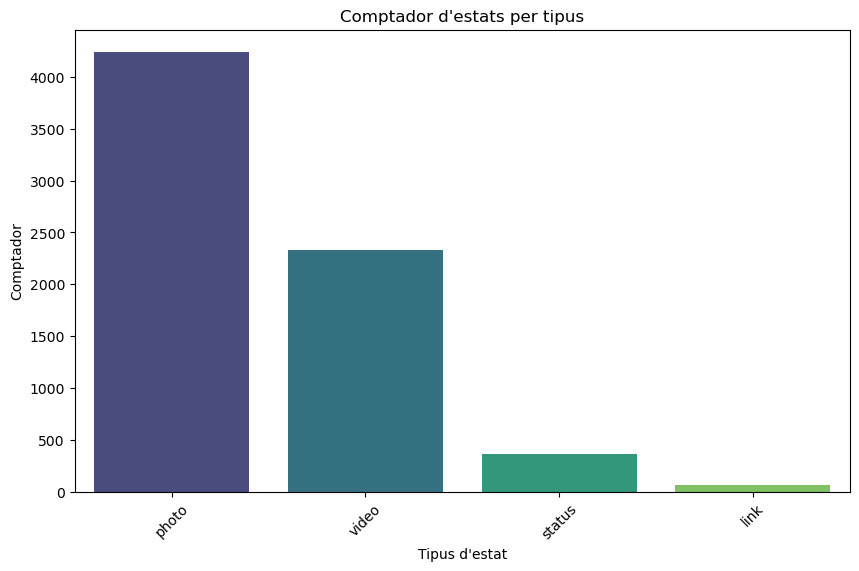

In [72]:
counts = df['status_type'].value_counts()

plt.figure(figsize=(10, 6))  

sns.barplot(x=counts.index, y=counts.values, palette="viridis")

# Personalitzar l'aspecte del gràfic
plt.xlabel('Tipus d\'estat')
plt.ylabel('Comptador')
plt.title('Comptador d\'estats per tipus')

# Girar les etiquetes de l'eix x per a millor llegibilitat (opcional)
plt.xticks(rotation=45)

# Mostrar el gràfic
plt.show()







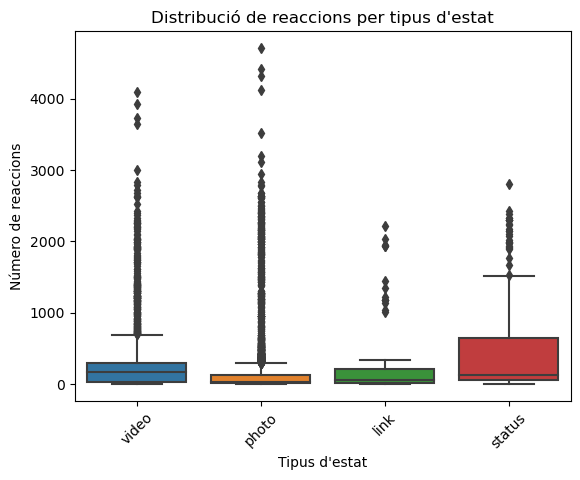

In [69]:
# Comprovem la distribució de les dades i els outliers existents 
sns.boxplot(x='status_type', y='num_reactions', data=df)
plt.xlabel('Tipus d\'estat')
plt.ylabel('Número de reaccions')
plt.title('Distribució de reaccions per tipus d\'estat')
plt.xticks(rotation=45)
plt.show()


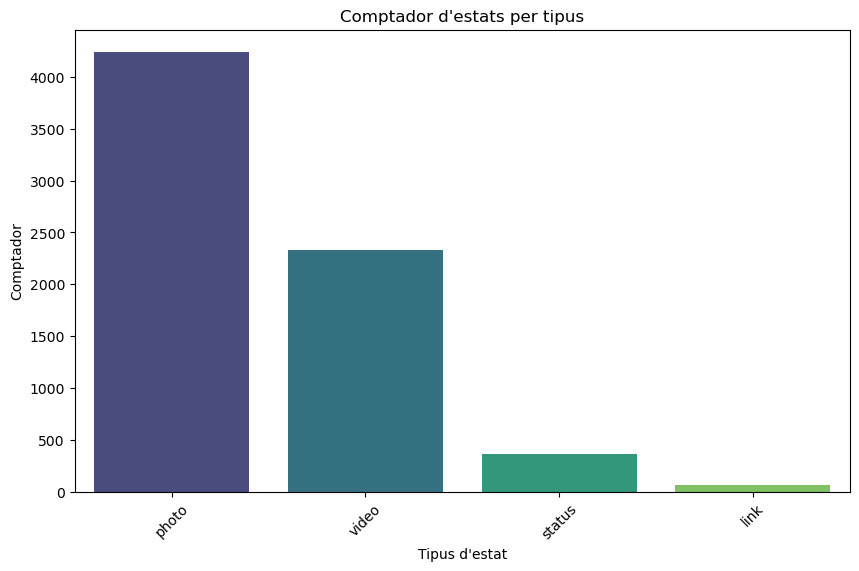

In [ ]:
'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'

In [53]:
# df = df_backup.copy()

In [25]:
from datetime import datetime

# Tu cadena de fecha y hora
cadena_fecha_hora = "4/22/2018 6:00"

# Parsear la cadena en un objeto datetime
fecha_hora_objeto = datetime.strptime(cadena_fecha_hora, "%m/%d/%Y %H:%M")

# Extraer la fecha y la hora por separado
fecha = fecha_hora_objeto.date()
hora = fecha_hora_objeto.time()

print("Fecha:", fecha)
print("Hora:", hora)


In [28]:
df2

<bound method NDFrame.copy of                               status_id status_type status_published  \
0      246675545449582_1649696485147474       video   4/22/2018 6:00   
1      246675545449582_1649426988507757       photo  4/21/2018 22:45   
2      246675545449582_1648730588577397       video   4/21/2018 6:17   
3      246675545449582_1648576705259452       photo   4/21/2018 2:29   
4      246675545449582_1645700502213739       photo   4/18/2018 3:22   
...                                 ...         ...              ...   
7045  1050855161656896_1061863470556065       photo   9/24/2016 2:58   
7046  1050855161656896_1061334757275603       photo  9/23/2016 11:19   
7047  1050855161656896_1060126464063099       photo  9/21/2016 23:03   
7048  1050855161656896_1058663487542730       photo   9/20/2016 0:43   
7049  1050855161656896_1050858841656528       photo  9/10/2016 10:30   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0               529     

# Exercici 1
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.




# Exercici 2
Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.


# Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.